<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


C:\Users\BiLi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

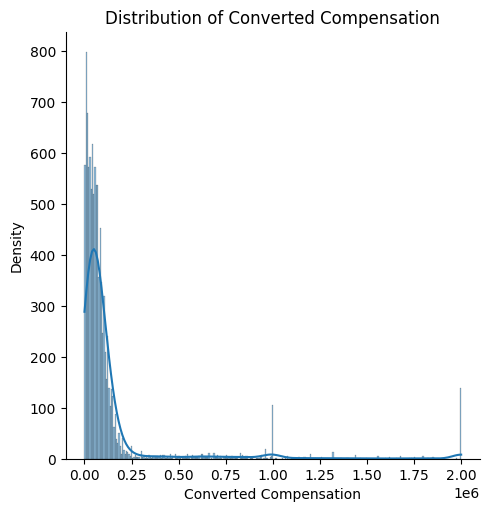

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot the distribution curve

plt.figure(figsize=(8, 6))
sns.displot(df['ConvertedComp'], kde=True)
plt.xlabel('Converted Compensation')
plt.ylabel('Density')
plt.title('Distribution of Converted Compensation')

plt.show()

Plot the histogram for the column `ConvertedComp`.


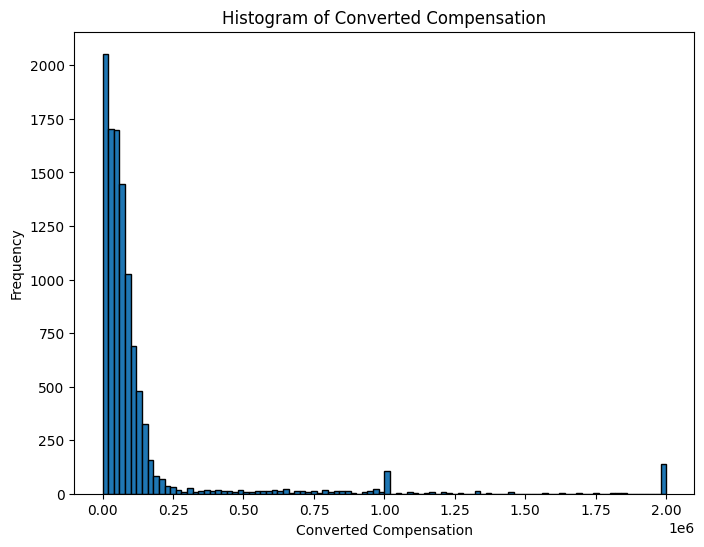

In [61]:
# your code goes here
# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(df['ConvertedComp'], bins=100, edgecolor='black')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.title('Histogram of Converted Compensation')
plt.show()

What is the median of the column `ConvertedComp`?


In [28]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [33]:
# your code goes here
Man = df[df['Gender'] == 'Man'].shape[0]
Man

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [40]:
# your code goes here
Woman_comp=df.loc[df['Gender'] == 'Woman','ConvertedComp']
Woman_comp.median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [47]:
# your code goes here
summary = df['Age'].describe()[['min', '25%', '50%', '75%', 'max']]

summary

min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


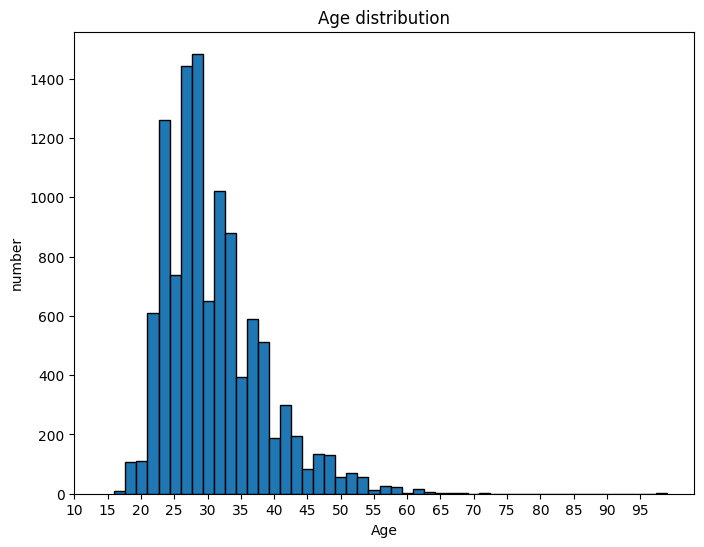

In [59]:
# your code goes here
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=50, edgecolor='black')
plt.xlabel('Age',fontsize = 10)
plt.ylabel('number')
plt.title('Age distribution')
# Increase the number of x-axis labels
plt.xticks(range(10, 100, 5))  # Adjust the range and step size as per your preference
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


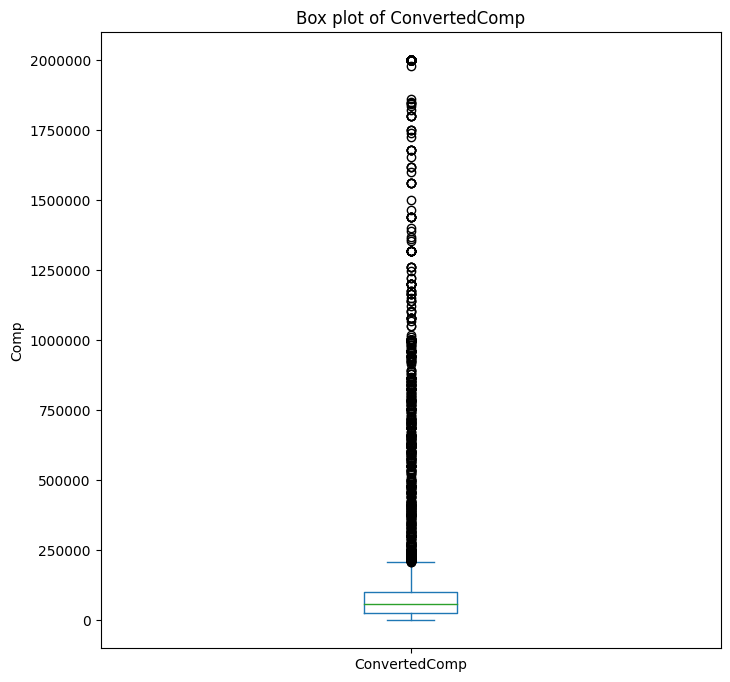

In [67]:
df['ConvertedComp'].plot(kind='box', figsize=(8,8))
plt.title('Box plot of ConvertedComp')
plt.ylabel('Comp')
# Adjust the y-axis tick labels
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [66]:
# Calculate the interquartile range for the column 'ConvertedComp'
q3 = df['ConvertedComp'].quantile(0.75)
q1 = df['ConvertedComp'].quantile(0.25)
iqr = q3 - q1

print("Interquartile Range (IQR) for the column 'ConvertedComp':", iqr)


Interquartile Range (IQR) for the column 'ConvertedComp': 73132.0


Find out the upper and lower bounds.


In [69]:
#The upper bound is typically defined as Q3 + 1.5 * IQR, and the lower bound is defined as Q1 - 1.5 *IQR

upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

print("The upper bound is:", upper_bound)
print("The lower bound is:", lower_bound)

The upper bound is: 209698.0
The lower bound is: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [71]:
outliner= df[df['ConvertedComp'] > upper_bound].shape[0] 
outliner

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [78]:
# your code goes here
df_filtered = df[(df['ConvertedComp'] <= upper_bound)]
df_filtered['ConvertedComp'].mean()

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [76]:
# Filter out non-numeric columns
numeric_columns = df.select_dtypes(include='number')

# Calculate the correlation between 'Age' and the numeric columns
correlation = numeric_columns.corr()['Age']

correlation

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
